# KPMG Virtual Internship
## by Imene KOLLI

## Module 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

Using the existing datasets (Customers and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

In [12]:
Customers = pd.read_csv('Customers.csv')

In [13]:
Customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,060 Morning Avenue,2016.0,NSW,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,6 Meadow Vale Court,2153.0,NSW,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,0,7.0,0 Holy Cross Court,4211.0,QLD,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,1,8.0,17979 Del Mar Point,2448.0,NSW,4.0


In [14]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   int64  
 10  owns_car                             4000 non-null   int64  
 11  tenure                        

In [16]:
Customers['DOB'] = pd.to_datetime(Customers['DOB'], format= '%Y-%m-%d')

In [17]:
Customers['age'] = round((datetime.datetime.now() - Customers['DOB']) / np.timedelta64(1, 'Y'))
Customers['age']

0       67.0
1       40.0
2       67.0
3       59.0
4       43.0
        ... 
3995    45.0
3996    19.0
3997     NaN
3998    47.0
3999    29.0
Name: age, Length: 4000, dtype: float64

In [18]:
Customers.loc[:, 'month'] = Customers['DOB'].dt.month
Customers['month']

0       10.0
1       12.0
2        1.0
3       10.0
4        5.0
        ... 
3995     8.0
3996     7.0
3997     NaN
3998    10.0
3999    11.0
Name: month, Length: 4000, dtype: float64

In [19]:
from sklearn import impute

knn_imputer = impute.KNNImputer(n_neighbors=2)
x = knn_imputer.fit_transform(Customers[['past_3_years_bike_related_purchases','deceased_indicator', 'owns_car','tenure','property_valuation', 'age', 'month']])

Customers[['past_3_years_bike_related_purchases','deceased_indicator', 'owns_car','tenure','property_valuation', 'age', 'month']] = x

In [20]:
Customers.drop(['DOB'], axis = 1, inplace=True)
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   float64
 5   job_title                            3494 non-null   object 
 6   job_industry_category                3344 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   float64
 9   owns_car                             4000 non-null   float64
 10  tenure                               4000 non-null   float64
 11  address                       

In [21]:
Customers.age.describe()

count    4000.00000
mean       43.18725
std        12.56843
min        19.00000
25%        34.00000
50%        43.00000
75%        53.00000
max        89.00000
Name: age, dtype: float64

In [22]:
Customers["Age_class"] = pd.cut(Customers["age"], bins=7, labels=False)

In [23]:
Customers.set_index('customer_id', inplace = True)
Customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,060 Morning Avenue,2016.0,NSW,10.0,67.0,10.0,4
2,Eli,Bockman,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,6 Meadow Vale Court,2153.0,NSW,10.0,40.0,12.0,2
3,Arlin,Dearle,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,NaN,NaN,NaN,7.5,67.0,1.0,4
4,Talbot,NaN,Male,33.0,NaN,IT,Mass Customer,0.0,0.0,7.0,0 Holy Cross Court,4211.0,QLD,9.0,59.0,10.0,3
5,Sheila-kathryn,Calton,Female,56.0,Senior Editor,NaN,Affluent Customer,0.0,1.0,8.0,17979 Del Mar Point,2448.0,NSW,4.0,43.0,5.0,2


In [24]:
Customers.drop(['first_name','last_name', 'address'], axis = 1, inplace=True)
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,NaN,NaN,7.5,67.0,1.0,4
4,Male,33.0,NaN,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,NaN,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [25]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               4000 non-null   object 
 1   past_3_years_bike_related_purchases  4000 non-null   float64
 2   job_title                            3494 non-null   object 
 3   job_industry_category                3344 non-null   object 
 4   wealth_segment                       4000 non-null   object 
 5   deceased_indicator                   4000 non-null   float64
 6   owns_car                             4000 non-null   float64
 7   tenure                               4000 non-null   float64
 8   postcode                             3996 non-null   float64
 9   state                                3996 non-null   object 
 10  property_valuation                   4000 non-null   float64
 11  age                           

In [26]:
Customers = Customers.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [27]:
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,7.5,67.0,1.0,4
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [28]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               4000 non-null   object 
 1   past_3_years_bike_related_purchases  4000 non-null   float64
 2   job_title                            4000 non-null   object 
 3   job_industry_category                4000 non-null   object 
 4   wealth_segment                       4000 non-null   object 
 5   deceased_indicator                   4000 non-null   float64
 6   owns_car                             4000 non-null   float64
 7   tenure                               4000 non-null   float64
 8   postcode                             4000 non-null   float64
 9   state                                4000 non-null   object 
 10  property_valuation                   4000 non-null   float64
 11  age                           

In [30]:
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 1, usecols = 'A:M', skiprows = 1)

In [31]:
Transactions = Transactions.dropna()
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [32]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [33]:
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']

Transactions['last_purchase_days_ago'] = (Transactions['transaction_date'].max() - Transactions['transaction_date'])
Transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')

Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,last_purchase_days_ago
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87,308.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55,223.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61,75.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36,121.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82,90.0


In [34]:
Transactions.drop(Transactions.query('customer_id == 5034').index.tolist(), axis=0 , inplace=True)

In [35]:
Transactions.online_order.value_counts()

1.0    9739
0.0    9703
Name: online_order, dtype: int64

In [36]:
Transactions.order_status.value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

In [37]:
Transactions.order_status.replace('Cancelled' , 0 , inplace=True)
Transactions.order_status.replace('Approved', 1 , inplace=True)

In [38]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19442 non-null  int64         
 1   product_id               19442 non-null  int64         
 2   customer_id              19442 non-null  int64         
 3   transaction_date         19442 non-null  datetime64[ns]
 4   online_order             19442 non-null  float64       
 5   order_status             19442 non-null  int64         
 6   brand                    19442 non-null  object        
 7   product_line             19442 non-null  object        
 8   product_class            19442 non-null  object        
 9   product_size             19442 non-null  object        
 10  list_price               19442 non-null  float64       
 11  standard_cost            19442 non-null  float64       
 12  product_first_sold_date  19442 n

In [39]:
T = pd.get_dummies(Transactions)
T

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,list_price,standard_cost,product_first_sold_date,profit,...,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small
0,1,2,2950,2017-02-25,0.0,1,71.49,53.62,41245.0,17.87,...,0,0,1,0,0,0,1,0,1,0
1,2,3,3120,2017-05-21,1.0,1,2091.47,388.92,41701.0,1702.55,...,0,0,1,0,0,0,1,1,0,0
2,3,37,402,2017-10-16,0.0,1,1793.43,248.82,36361.0,1544.61,...,0,0,1,0,0,1,0,0,1,0
3,4,88,3135,2017-08-31,0.0,1,1198.46,381.10,36145.0,817.36,...,0,0,1,0,0,0,1,0,1,0
4,5,78,787,2017-10-01,1.0,1,1765.30,709.48,42226.0,1055.82,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,1,2005.66,1203.40,37823.0,802.26,...,0,0,1,0,1,0,0,0,1,0
19996,19997,41,127,2017-11-09,1.0,1,416.98,312.74,35560.0,104.24,...,0,1,0,0,0,0,1,0,1,0
19997,19998,87,2284,2017-04-14,1.0,1,1636.90,44.71,40410.0,1592.19,...,0,0,1,0,0,0,1,0,1,0
19998,19999,6,2764,2017-07-03,0.0,1,227.88,136.73,38216.0,91.15,...,0,0,1,0,1,0,0,0,1,0


In [40]:
Customers_transactions = T.groupby('customer_id').agg({
    'customer_id': lambda x: len(x),
    'online_order': lambda x: x.sum(),
    'order_status': lambda x: x.sum(),
    'list_price': lambda x: x.mean(),
    'standard_cost': lambda x: x.mean(),
    'profit': lambda x: x.sum(),
    'last_purchase_days_ago': lambda x: x.min(),
    'brand_Giant Bicycles': lambda x: x.sum(),
    'brand_Norco Bicycles': lambda x: x.sum(),
    'brand_OHM Cycles': lambda x: x.sum(),
    'brand_Solex': lambda x: x.sum(),
    'brand_Trek Bicycles': lambda x: x.sum(),
    'brand_WeareA2B': lambda x: x.sum(),
    'product_line_Mountain': lambda x: x.sum(),
    'product_line_Road': lambda x: x.sum(),
    'product_line_Standard': lambda x: x.sum(),
    'product_line_Touring': lambda x: x.sum(),
    'product_class_high': lambda x: x.sum(),
    'product_class_low': lambda x: x.sum(),
    'product_class_medium': lambda x: x.sum(),
    'product_size_large': lambda x: x.sum(),
    'product_size_medium': lambda x: x.sum(),
    'product_size_small': lambda x: x.sum()
})

Customers_transactions.rename(columns={
    'customer_id':'N_transactions',
    'online_order': 'online_orders',
    'order_status': 'approved_orders',
    'list_price': 'avg_price',
    'standard_cost': 'avg_cost',
    'profit': 'profit',
    'last_purchase_days_ago': 'lastest_purchase_days_ago',
    'brand_Giant Bicycles': 'Giant_Bicycles',
    'brand_Norco Bicycles': 'Norco_Bicycles',
    'brand_OHM Cycles': 'OHM_Bicycles',
    'brand_Solex': 'Solex',
    'brand_Trek Bicycles': 'Trek_Bicycles',
    'brand_WeareA2B': 'WeareA2B',
    'product_line_Mountain': 'Mountain',
    'product_line_Road': 'Road',
    'product_line_Standard': 'Standard',
    'product_line_Touring': 'Touring',
    'product_class_high': 'high_class',
    'product_class_low': 'low_class',
    'product_class_medium': 'medium_class',
    'product_size_large': 'large_size',
    'product_size_medium': 'medium_size',
    'product_size_small': 'small_size'
    }, inplace=True
)

In [41]:
Customers_transactions['earliest_purchase_days_ago'] = Transactions.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.max()})

In [42]:
Customers_transactions.head()

,N_transactions,online_orders,approved_orders,avg_price,avg_cost,profit,lastest_purchase_days_ago,Giant_Bicycles,Norco_Bicycles,OHM_Bicycles,...,Road,Standard,Touring,high_class,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago
customer_id,,,,,,,,,,,,,,,,,,,,,
1,11,6.0,11,825.859091,551.487273,3018.09,7.0,4,2,2,...,3,7,0,1,2,8,0,9,2,359.0
2,3,1.0,3,1383.023333,640.936667,2226.26,128.0,1,0,0,...,0,3,0,0,0,3,0,3,0,240.0
3,7,1.0,7,1360.745714,890.715714,3290.21,102.0,2,2,0,...,3,3,0,1,2,4,3,2,2,310.0
4,2,1.0,2,523.860000,413.575000,220.57,195.0,1,0,0,...,0,2,0,0,0,2,1,1,0,271.0
5,6,2.0,6,983.866667,584.710000,2394.94,16.0,1,2,0,...,3,2,0,1,2,3,2,2,2,302.0


In [43]:
Customers_transactions.shape

(3491, 24)

In [44]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
Customers_transactions['profit_class'] = pd.qcut(Customers_transactions['profit'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [45]:
bin_labels_5 = ['1', '2', '3', '4', '5']
Customers_transactions['frequency'] = pd.qcut(Customers_transactions['N_transactions'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [46]:
bin_labels_5 = ['5', '4', '3', '2', '1']
Customers_transactions['recency'] = pd.qcut(Customers_transactions['lastest_purchase_days_ago'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [47]:
Customers_transactions['online_orders'] = Customers_transactions['online_orders'].astype(int)
Customers_transactions['lastest_purchase_days_ago'] = Customers_transactions['lastest_purchase_days_ago'].astype(int)
Customers_transactions['earliest_purchase_days_ago'] = Customers_transactions['earliest_purchase_days_ago'].astype(int)
Customers_transactions['frequency'] = Customers_transactions['frequency'].astype(int)
Customers_transactions['recency'] = Customers_transactions['recency'].astype(int)

In [48]:
Customers_transactions['fav_brand'] = Customers_transactions[['Giant_Bicycles', 'Norco_Bicycles','OHM_Bicycles','Solex','Trek_Bicycles','WeareA2B']].idxmax(axis=1)

In [49]:
Customers_transactions.head()

,N_transactions,online_orders,approved_orders,avg_price,avg_cost,profit,lastest_purchase_days_ago,Giant_Bicycles,Norco_Bicycles,OHM_Bicycles,...,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago,profit_class,frequency,recency,fav_brand
customer_id,,,,,,,,,,,,,,,,,,,,,
1,11,6,11,825.859091,551.487273,3018.09,7,4,2,2,...,2,8,0,9,2,359,Gold,5,5,Giant_Bicycles
2,3,1,3,1383.023333,640.936667,2226.26,128,1,0,0,...,0,3,0,3,0,240,Silver,1,1,WeareA2B
3,7,1,7,1360.745714,890.715714,3290.21,102,2,2,0,...,2,4,3,2,2,310,Gold,4,2,Trek_Bicycles
4,2,1,2,523.860000,413.575000,220.57,195,1,0,0,...,0,2,1,1,0,271,Bronze,1,1,Giant_Bicycles
5,6,2,6,983.866667,584.710000,2394.94,16,1,2,0,...,2,3,2,2,2,302,Silver,3,4,Norco_Bicycles


In [50]:
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,7.5,67.0,1.0,4
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [51]:
Customers.index = Customers.index.astype(int)

In [52]:
Customers_final = Customers.join(Customers_transactions, how='right')

In [53]:
Customers_final

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,...,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago,profit_class,frequency,recency,fav_brand
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,...,2,8,0,9,2,359,Gold,5,5,Giant_Bicycles
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,...,0,3,0,3,0,240,Silver,1,1,WeareA2B
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,...,2,4,3,2,2,310,Gold,4,2,Trek_Bicycles
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,...,0,2,1,1,0,271,Bronze,1,1,Giant_Bicycles
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,...,2,3,2,2,2,302,Silver,3,4,Norco_Bicycles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,Male,99.0,Editor,Manufacturing,Mass Customer,0.0,1.0,19.0,2171.0,NSW,...,1,2,0,3,1,298,Silver,1,1,Norco_Bicycles
3497,Female,73.0,Administrative Assistant IV,Manufacturing,Affluent Customer,0.0,1.0,18.0,3976.0,VIC,...,0,3,1,2,0,120,Silver,1,3,Giant_Bicycles
3498,Female,28.0,Business Systems Development Analyst,Manufacturing,Mass Customer,0.0,0.0,5.0,3012.0,VIC,...,0,5,1,4,1,330,Gold,3,1,Solex


## Univariate analysis

First, a univariate analysis for my categorical variables.

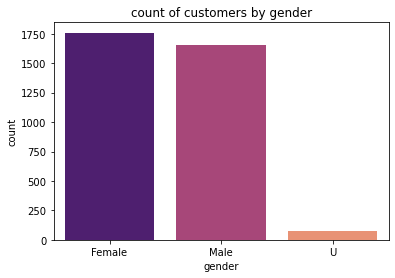

In [54]:
# there are more authorized transactions than posted

sns.countplot(x = 'gender', data = Customers_final, palette = 'magma')
plt.title('count of customers by gender');

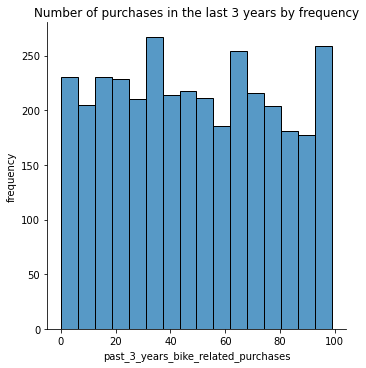

In [55]:
sns.displot(x='past_3_years_bike_related_purchases', data = Customers_final, palette = 'magma')
plt.title('Number of purchases in the last 3 years by frequency')
plt.ylabel('frequency');

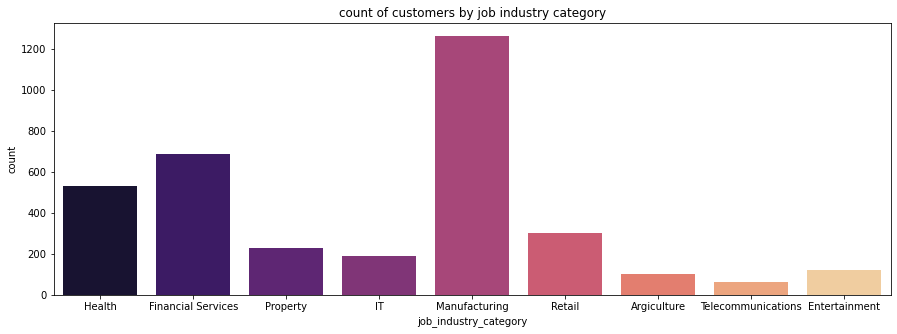

In [56]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, palette = 'magma')
plt.title('count of customers by job industry category');

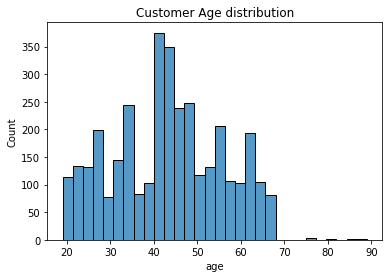

In [57]:
sns.histplot(data = Customers_final , x='age', palette = 'magma')
plt.title('Customer Age distribution');

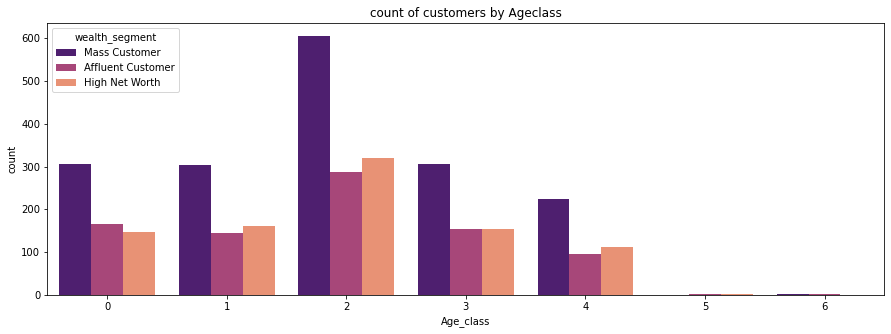

In [58]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'Age_class', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by Ageclass');

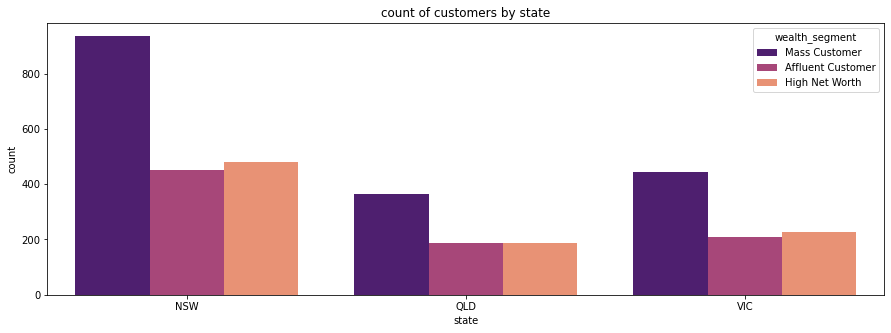

In [59]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'state', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by state');

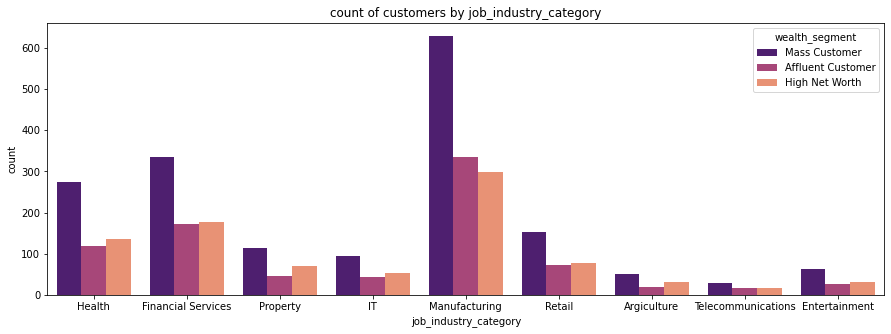

In [60]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by job_industry_category');

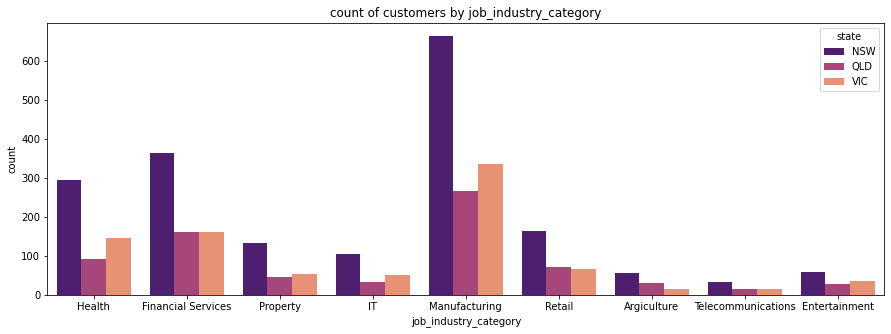

In [61]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='state', palette = 'magma')
plt.title('count of customers by job_industry_category');

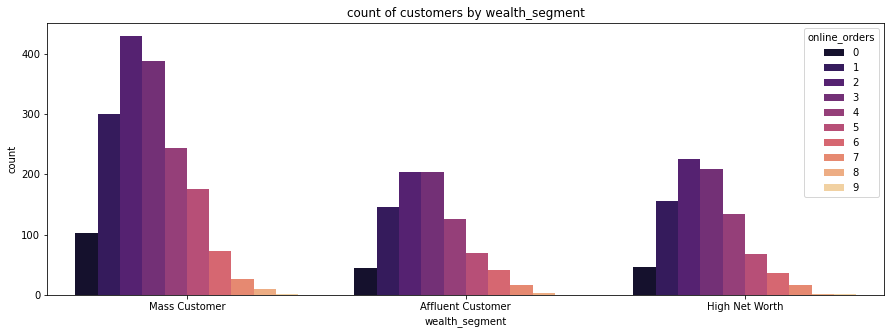

In [62]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'wealth_segment', data = Customers_final, hue='online_orders', palette = 'magma')
plt.title('count of customers by wealth_segment');

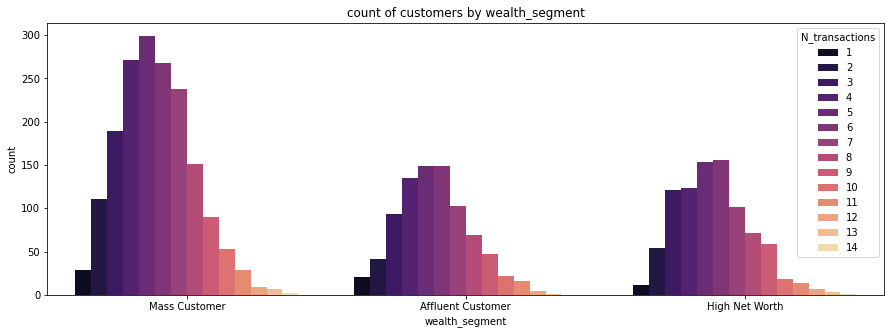

In [63]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'wealth_segment', data = Customers_final, hue='N_transactions', palette = 'magma')
plt.title('count of customers by wealth_segment');

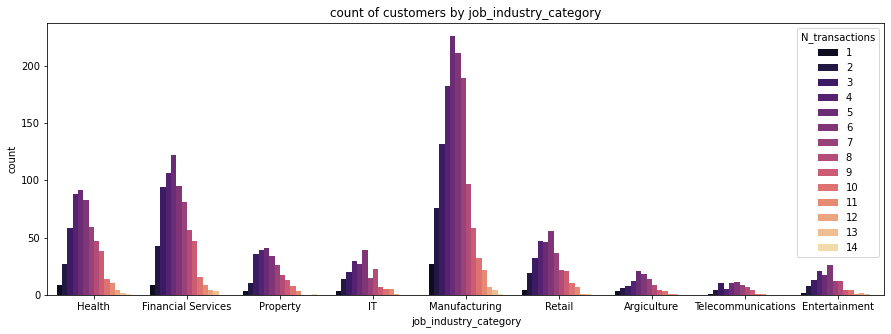

In [64]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='N_transactions', palette = 'magma')
plt.title('count of customers by job_industry_category');

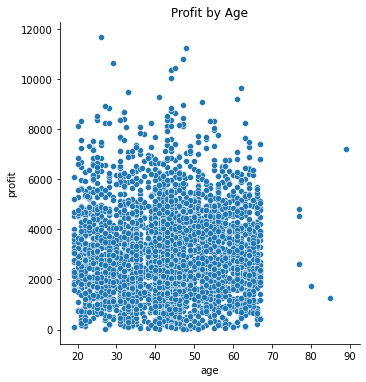

In [65]:
sns.relplot(y='profit', x='age' ,data=Customers_final, palette = 'magma' )
plt.title('Profit by Age');

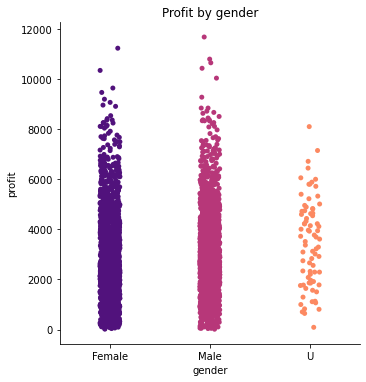

In [66]:
sns.catplot(y='profit', x='gender', data=Customers_final, palette = 'magma' )
plt.title('Profit by gender');

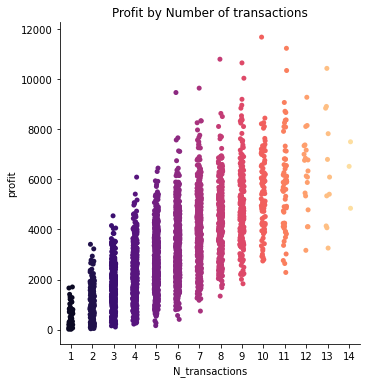

In [67]:
sns.catplot(y='profit', x='N_transactions', data=Customers_final, palette = 'magma' )
plt.title('Profit by Number of transactions');

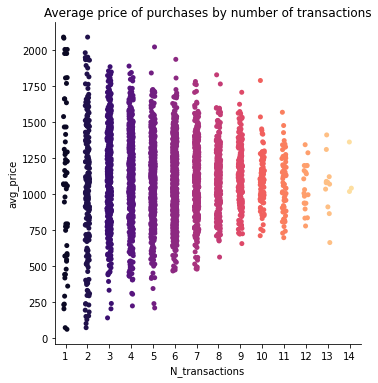

In [68]:
sns.catplot(y='avg_price', x='N_transactions', data=Customers_final, palette = 'magma' )
plt.title('Average price of purchases by number of transactions');

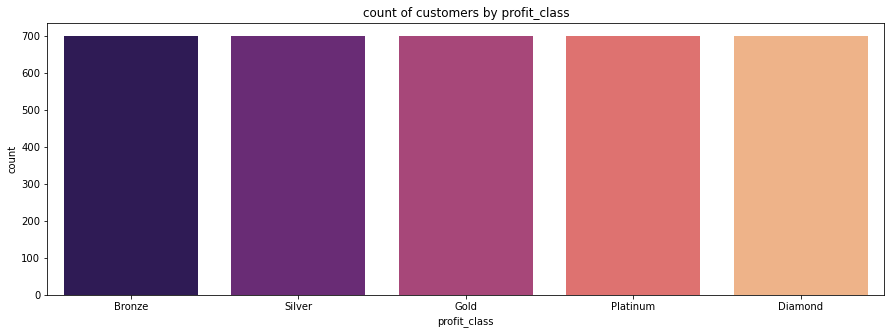

In [69]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'profit_class', data = Customers_final, palette = 'magma')
plt.title('count of customers by profit_class');

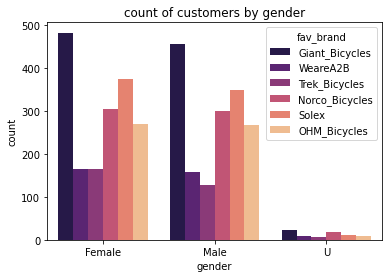

In [70]:
sns.countplot(x = 'gender', hue='fav_brand', data = Customers_final, palette = 'magma')
plt.title('count of customers by gender');

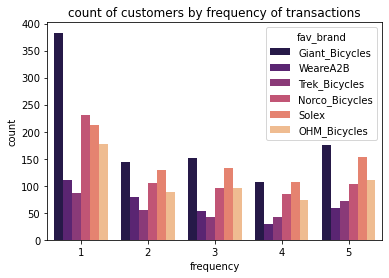

In [71]:
sns.countplot(x = 'frequency', hue='fav_brand', data = Customers_final, palette = 'magma')
plt.title('count of customers by frequency of transactions');

In [72]:
#Storing the clean DataFrame in a CSV file called twitter_master
Customers_final.to_csv('Customers_final.csv', index=False)